 Import Required Libraries

First, we'll import the necessary libraries for data handling, visualization, and machine learning.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


Load the Dataset

We'll load the dataset from the given path.

In [42]:
# Load the dataset
file_path = r"C:/Users/user/OneDrive/Desktop/umrais/CodeAlpha/iris/Iris.csv"
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(iris_data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Explore the Data

We’ll examine the dataset for key insights.

i  Check for null values:

In [43]:
print(iris_data.info())
print(iris_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


ii   Basic statistics:

In [44]:
print(iris_data.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Species distribution:

In [45]:
print(iris_data['Species'].value_counts())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Columns in iris_data: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


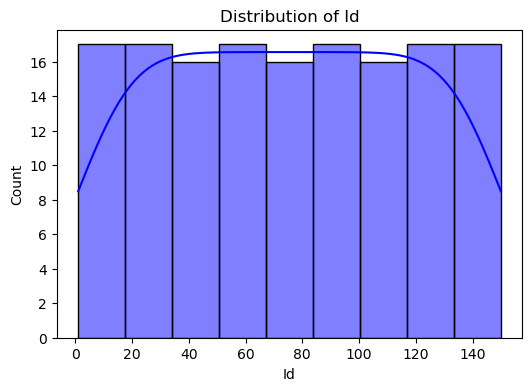

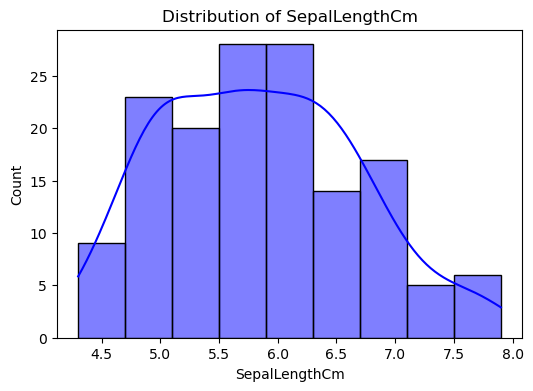

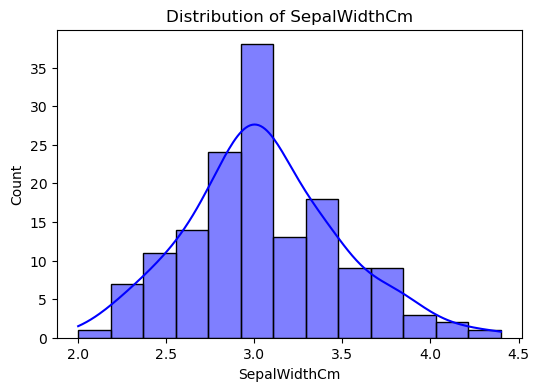

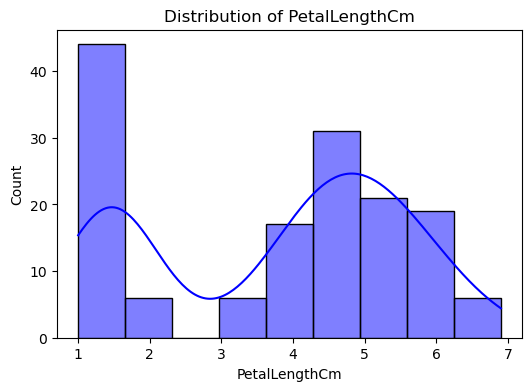

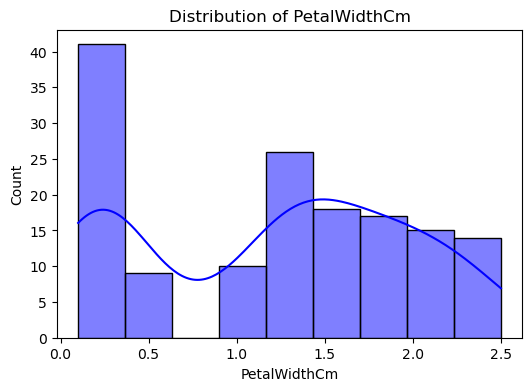

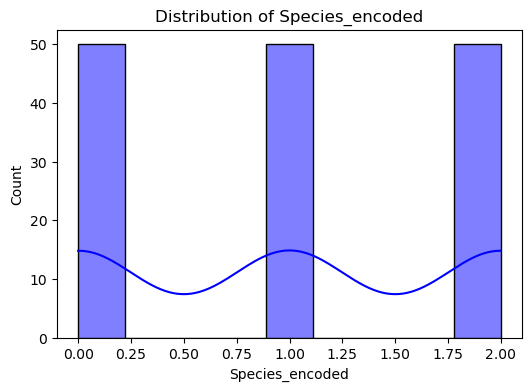

In [46]:
# Check the columns in the dataset
print("Columns in iris_data:", iris_data.columns)

# Univariate Analysis: Distribution of Features
for column in numeric_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_data[column], kde=True, color='blue')  # Use numeric_data directly
    plt.title(f"Distribution of {column}")
    plt.show()


Visualize the Data

Let’s plot some graphs to understand the relationships.



i Pairplot for feature relationships:

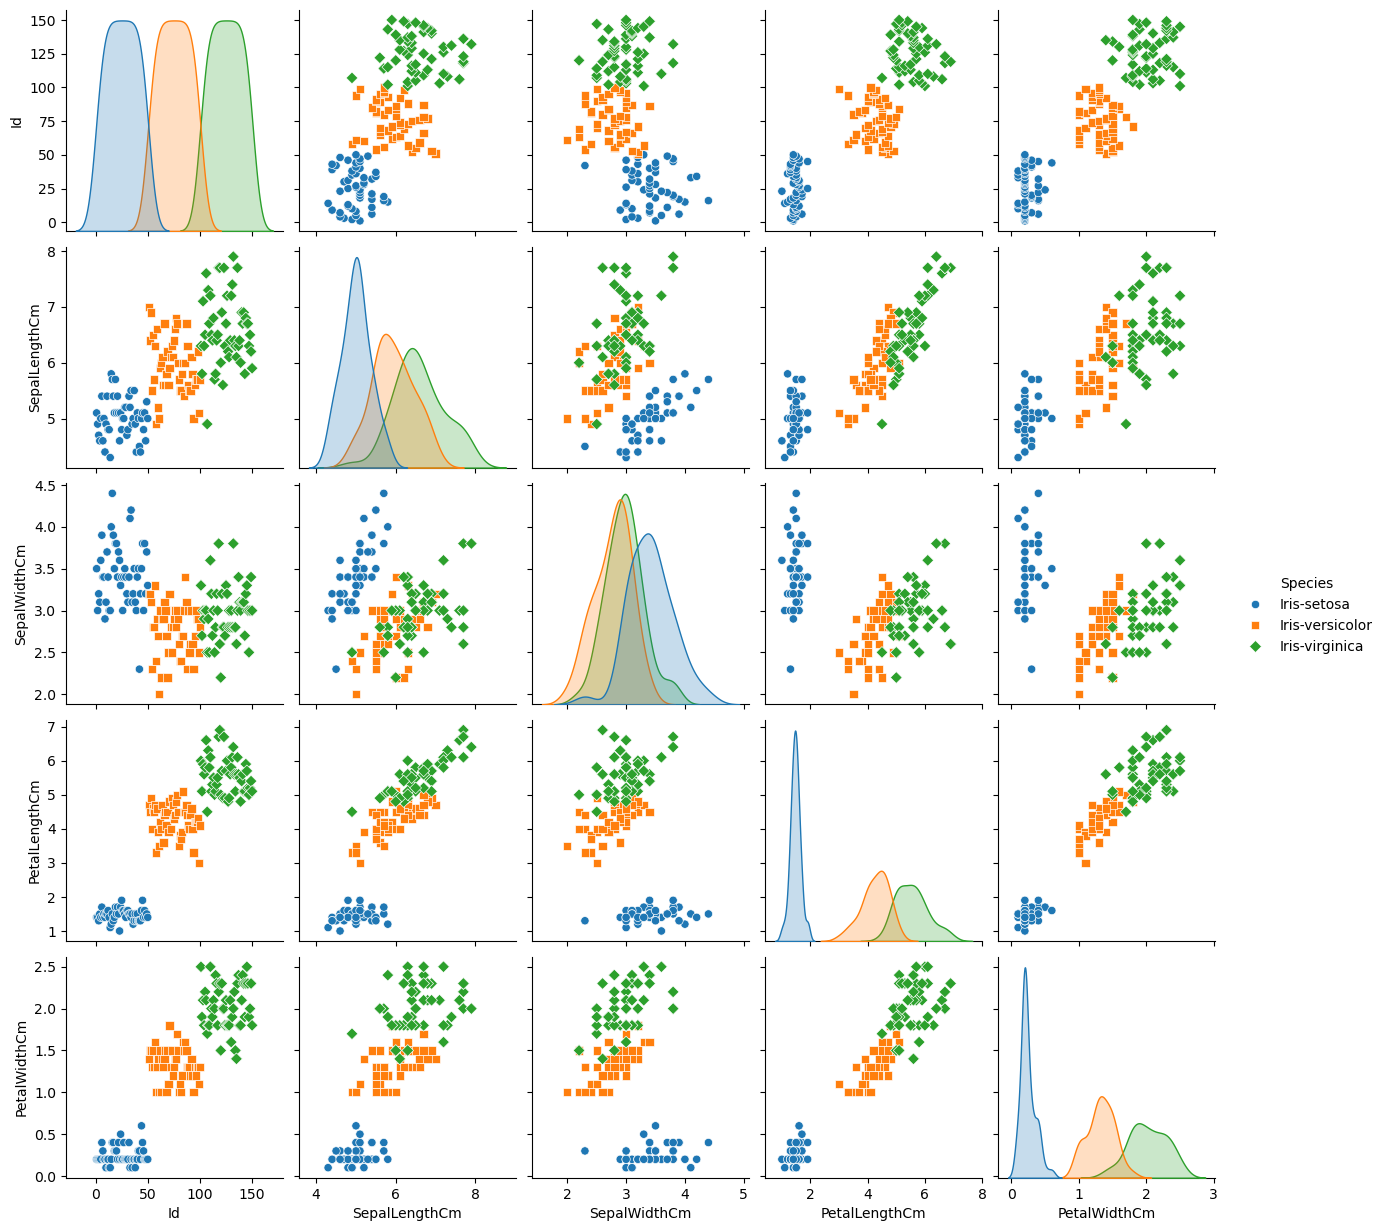

In [47]:
sns.pairplot(iris_data, hue="Species", markers=["o", "s", "D"])
plt.show()


ii Correlation Heatmap:

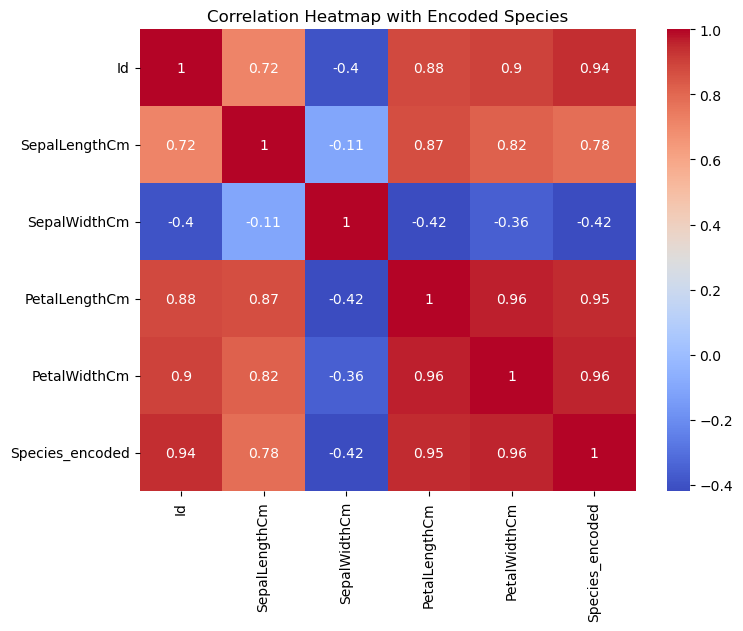

In [48]:
# Encode Species column
label_encoder = LabelEncoder()
iris_data["Species_encoded"] = label_encoder.fit_transform(iris_data["Species"])

# Compute correlation (including the encoded species)
numeric_data = iris_data.drop(columns=["Species"])  # Drop original species column
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Encoded Species")
plt.show()


In [49]:
# Outlier Detection and Removal
from scipy.stats import zscore
z_scores = np.abs(zscore(numeric_data))
iris_data_cleaned = iris_data[(z_scores < 3).all(axis=1)]
print(f"Shape before cleaning: {iris_data.shape}")
print(f"Shape after cleaning: {iris_data_cleaned.shape}")


Shape before cleaning: (150, 7)
Shape after cleaning: (149, 7)


Preprocessing

i Drop unnecessary columns:

In [50]:
iris_data = iris_data.drop(columns=["Id"])  # Assuming 'Id' column exists


ii Encode target labels:

In [51]:
label_encoder = LabelEncoder()
iris_data["Species"] = label_encoder.fit_transform(iris_data["Species"])


iii Split the data:

In [52]:
X = iris_data.drop(columns=["Species"])
y = iris_data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
# Trying Multiple Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

print("Model Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


Model Performance:
Random Forest: 1.00
SVM: 1.00
KNN: 1.00
Logistic Regression: 1.00


Train the Model

In [55]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to train the final model
best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)


Best Parameters: {'max_depth': None, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50)

Evaluate the Model

i Predictions and accuracy:

In [56]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


ii Classification report:

In [57]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



iii Confusion matrix:

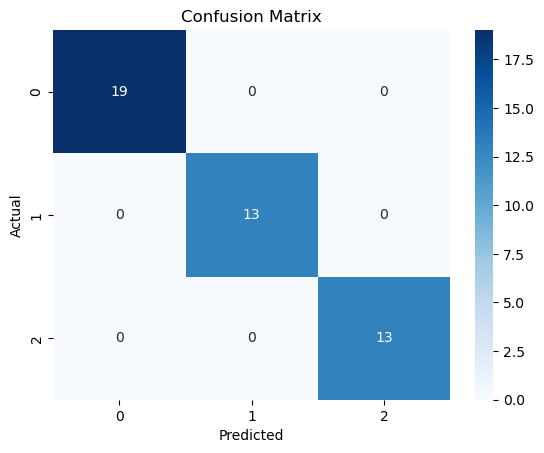

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14304\2551892737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


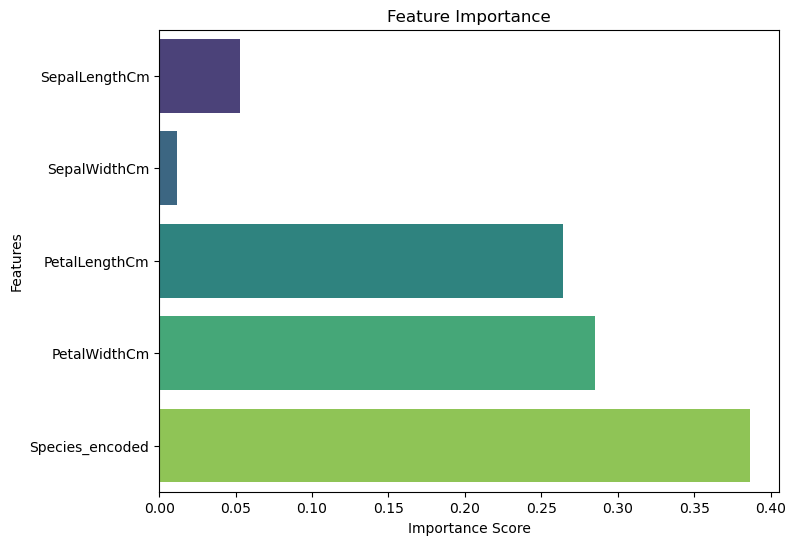

In [59]:
# Feature Importance Analysis
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
